In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_ollama import ChatOllama
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()
llm =  ChatOllama(model="llama3.2", temperature=0.2)
from pprint import pprint

In [5]:
## define state
class LLMState(TypedDict):
    
    topic : str
    summary : str
    quiz : str
   
## define nodes of graph
def generate_summary(state: LLMState) -> LLMState:
    
    ## extract topic from the state
    topic = state['topic']
    
    ## create prompt from the topic
    prompt = f"Generate summary on the following: {topic}"
    
    ## pass to LLM and retrive the summary from LLM
    summary = llm.invoke(prompt).content
    
    ## return summary to the state
    state['summary'] = summary
    
    return state

def generate_quiz(state: LLMState) -> LLMState:
    
    ## extract summary from the state
    summary = state['summary']
    
    ## create prompt from the topic
    prompt = f"Generate 10 mcq quiz on the following: {summary}"
    
    ## pass to LLM and retrive the quiz from LLM
    quiz = llm.invoke(prompt).content
    
    ## return quiz to the state
    state['quiz'] = quiz
    
    return state
    
    

In [10]:
## define graph
graph = StateGraph(LLMState)

## add nodes
graph.add_node('generate_summary',generate_summary)
graph.add_node('generate_quiz',generate_quiz)

## add edges
graph.add_edge(START, 'generate_summary')
graph.add_edge('generate_summary','generate_quiz')
graph.add_edge('generate_quiz',END)

## compile
workflow = graph.compile()

## execute workflow
initial_state = {'topic': "langchain Vs langgraph"}
final_state = workflow.invoke(initial_state)

from pprint import pprint

print("\n🟦 INPUT STATE")
pprint(initial_state)

print("\n🟩 FINAL STATE")
pprint(final_state)



🟦 INPUT STATE
{'topic': 'langchain Vs langgraph'}

🟩 FINAL STATE
{'quiz': 'Here are 10 MCQ questions based on the provided information about '
         'LangChain and LangGraph:\n'
         '\n'
         '1. What is LangChain?\n'
         'A) A Python library for building conversational AI models\n'
         'B) A comprehensive framework for natural language processing\n'
         'C) A dialogue management system for chatbots\n'
         'D) A machine learning library for computer vision\n'
         '\n'
         'Answer: A) A Python library for building conversational AI models\n'
         '\n'
         '2. Which of the following is a key feature of LangChain?\n'
         'A) Support for graph-based reasoning\n'
         'B) Easy integration with other libraries and frameworks\n'
         'C) Built-in support for dialogue management frameworks\n'
         'D) Advanced NLP techniques for complex conversations\n'
         '\n'
         'Answer: B) Easy integration with other libraries 

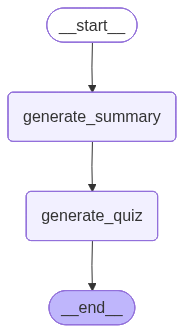

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())